# World Happiness Report

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt        
import plotly.plotly as py 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
init_notebook_mode(connected=True)

### Problem Definition

The objectives of this analysis are: <br>
    -Check the evolution of happiness rank throughout the years (2015-2016) <br> 
    -Find the happiest regions in each year <br>
    -Find out the factors that influenced happiness the most in each year <br>
   
. Objectives <br>
. Deliverables <br>
. Roles and responsibilities <br> 
. Current situation <br>
. Timeline <br>
. Costs and benefits <br>

### Data Preparation

Prepare and become familiar with the data: <br>
. Pull together data table <br>
. Categorize the data <br>
. Clean the data <br>
. Remove unnecessary data <br>
. Transform the data <br>
. Partition the data <br>

#### Data overview

##### 2015

In [61]:
df_2015 = pd.read_csv(r'2015.csv')

There are 158 records in this table and 12 features. All these features are not null. The features are: <br>
Country - Name of the country - object type <br>
Region - Region the country belongs to - object type <br>
Happiness Rank - Rank of the country based on the Happiness Score. - integer <br>
Happiness Score - A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest." - float type from 0.0 to 10.0 <br>
Standard Error - The standard error of the happiness score. - float type <br>
Economy (GDP per Capita) - The extent to which GDP contributes to the calculation of the Happiness Score. - float type <br>
Family - The extent to which Family contributes to the calculation of the Happiness Score - float type <br>
Health (Life Expectancy) - The extent to which Life expectancy contributed to the calculation of the Happiness Score - float type <br>
Freedom - The extent to which Freedom contributed to the calculation of the Happiness Score. - float type <br>
Trust (Government Corruption) - The extent to which Perception of Corruption contributes to Happiness Score. - float type <br>
Generosity - The extent to which Generosity contributed to the calculation of the Happiness Score. - float type <br>
Dystopia Residual - The extent to which Dystopia Residual contributed to the calculation of the Happiness Score. - float type <br>

What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

In [65]:
df_2015.isnull().values.any()

False

There are no null values

In [66]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


As can be seen the 5 happiest countries are Switzerland, Iceland, Denmark, Norway and Canada, 4 of them from Western Europe

In [67]:
df_2015.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


The 5 unhappiest countries are Rwanda, Benin, Syria, Burundi and Togo, 4 of them are from Sub-Saharan Africa.

In [68]:
df_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


The happiness score mean is 5.37, with a low standard deviation 1.14

##### 2016

In [62]:
df_2016 = pd.read_csv(r'2016.csv')

In [70]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.0+ KB


There are 157 records in this table and 13 features. 
The variables are almost the same, compared to 2015, but there are 2 new features: lower confidence interval and upper confidence interval, both float type. Standard error from 2015 is not present on the 2016 csv.

In [71]:
df_2016.isnull().values.any()

False

There are no null values

In [72]:
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


The happiest countries are all from Western Europe. Switzerland dropped to 2nd place and Denmark went from 3rd in 2015 to 1st.

In [73]:
df_2016.tail()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


In [ ]:
df_2016.describe()

The mean of happiness score is 5.38 and the standard deviation is 1.14

##### Merge 2015 and 2016 

In [63]:
df = pd.merge(df_2015[['Country','Region', 'Happiness Rank', 'Happiness Score']], df_2016[['Country','Region', 'Happiness Rank', 'Happiness Score']], how='inner', on='Country')
df = df.drop('Region_y', 1)
df.columns = ['Country', 'Region', 'Happiness Rank 2015', 'Happiness Score 2015', 'Happiness Rank 2016', 'Happiness Score 2016']
df

,Country,Region,Happiness Rank 2015,Happiness Score 2015,Happiness Rank 2016,Happiness Score 2016
0,Switzerland,Western Europe,1,7.587,2,7.509
1,Iceland,Western Europe,2,7.561,3,7.501
2,Denmark,Western Europe,3,7.527,1,7.526
3,Norway,Western Europe,4,7.522,4,7.498
4,Canada,North America,5,7.427,6,7.404
5,Finland,Western Europe,6,7.406,5,7.413
6,Netherlands,Western Europe,7,7.378,7,7.339
7,Sweden,Western Europe,8,7.364,10,7.291
8,New Zealand,Australia and New Zealand,9,7.286,8,7.334
9,Australia,Australia and New Zealand,10,7.284,9,7.313


In [83]:
df.isnull().values.any()

False

In [84]:
df.columns

Index(['Country', 'Region', 'Happiness Rank 2015', 'Happiness Score 2015',
       'Happiness Rank 2016', 'Happiness Score 2016', 'Happiness Rank 2017',
       'Happiness Score 2017'],
      dtype='object')

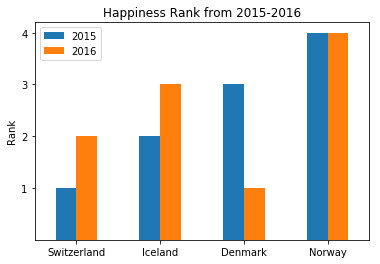

In [8]:
countries = ['Switzerland', 'Iceland', 'Denmark', 'Norway']
countries_table = df[(df.Country == countries[0]) | (df.Country == countries[1]) | (df.Country == countries[2]) | (df.Country == countries[3])]
df_plot = pd.DataFrame({'2015': countries_table['Happiness Rank 2015'].tolist() , '2016': countries_table['Happiness Rank 2016'].tolist()} , index=countries)
ax = df_plot.plot.bar(rot=0, title = 'Happiness Rank from 2015-2016')
ax.set_ylabel("Rank")
ax.set_yticks([1,2,3,4])

These countries were chosen based on the fact that they're always on top 5 in 2015 and 2016. As can be seen, Switzerland started in 1st in 2015 and dropped to 2th in 2016. Iceland dropped from 2nd in 2015 to 3rd in 2016. Denmark began in 3rd in 2015 and went to 1st in 2016. Norway ranked 4th in 2015 and 2016.

###### Countries with biggest rank improvement

In [65]:
df["Difference Rank"] = df['Happiness Rank 2015']- df['Happiness Rank 2016']
improving = df.sort_values(['Difference Rank'], ascending = False)
improving.head(5)

,Country,Region,Happiness Rank 2015,Happiness Score 2015,Happiness Rank 2016,Happiness Score 2016,Difference Rank
66,Algeria,Middle East and Northern Africa,68,5.605,38,6.355,30
87,Latvia,Central and Eastern Europe,89,5.098,68,5.560,21
126,Cameroon,Sub-Saharan Africa,133,4.252,114,4.513,19
84,Romania,Central and Eastern Europe,86,5.124,71,5.528,15
125,Sri Lanka,Southern Asia,132,4.271,117,4.415,15


###### Countries with highest rank drop

In [67]:
df["Difference Rank"] = df['Happiness Rank 2016']- df['Happiness Rank 2015']
falling = df.sort_values(['Difference Rank'], ascending = False)
falling.head(5)

,Country,Region,Happiness Rank 2015,Happiness Score 2015,Happiness Rank 2016,Happiness Score 2016,Difference Rank
110,Liberia,Sub-Saharan Africa,116,4.571,150,3.622,34
76,Nigeria,Sub-Saharan Africa,78,5.268,103,4.875,25
21,Venezuela,Latin America and Caribbean,23,6.810,44,6.084,21
83,Zambia,Sub-Saharan Africa,85,5.129,106,4.795,21
73,Vietnam,Southeastern Asia,75,5.360,96,5.061,21


#### Continent analysis

##### 2015

In [86]:
world_map_2015 = dict(type = 'choropleth', 
           locations = df_2015['Country'],
           locationmode = 'country names',
           z = df_2015['Happiness Rank'], 
           text = df_2015['Country'],
          colorscale = 'Viridis', reversescale = False)
layout = dict(title = 'Happiness Rank across the world in 2015', width = 800,
        height = 700, geo = dict(showframe = False, projection = {'type': 'mercator'}))
map_2015 = go.Figure(data = [world_map_2015], layout=layout)
iplot(map_2015)

Darker colors represent higher rank. As can be seen, America, Europe and Oceania are the happiest continents

##### 2016

In [87]:
world_map_2016 = dict(type = 'choropleth', 
           locations = df_2016['Country'],
           locationmode = 'country names',
           z = df_2016['Happiness Rank'], 
           text = df_2016['Country'],
          colorscale = 'Viridis', reversescale = False)
layout = dict(title = 'Happiness Rank across the world in 2016', width = 800,
        height = 700, geo = dict(showframe = False, projection = {'type': 'mercator'}))
map_2016 = go.Figure(data = [world_map_2016], layout=layout)
iplot(map_2016)

As can be seen, America, Europe and Oceania are still the happiest continents

#### Region analysis

##### 2015

In [89]:
set(df_2015.Region) 

{'Australia and New Zealand',
 'Central and Eastern Europe',
 'Eastern Asia',
 'Latin America and Caribbean',
 'Middle East and Northern Africa',
 'North America',
 'Southeastern Asia',
 'Southern Asia',
 'Sub-Saharan Africa',
 'Western Europe'}

In [50]:
table_regions_2015=df_2015.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)
table_regions_2015

Region
Australia and New Zealand          7.285000
North America                      7.273000
Western Europe                     6.689619
Latin America and Caribbean        6.144682
Eastern Asia                       5.626167
Middle East and Northern Africa    5.406900
Central and Eastern Europe         5.332931
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Name: Happiness Score, dtype: float64

Australia and New Zealand, North America and Western Europe are in average the regions with a highest score in happiness, as seen previously in the map.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

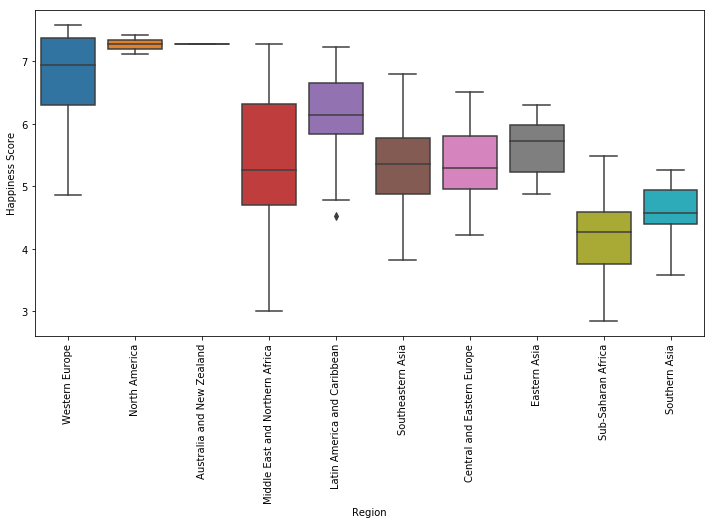

In [41]:
fig, axes = plt.subplots(figsize=(12, 6))
sns.boxplot(x='Region', y='Happiness Score', data = df_2015)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

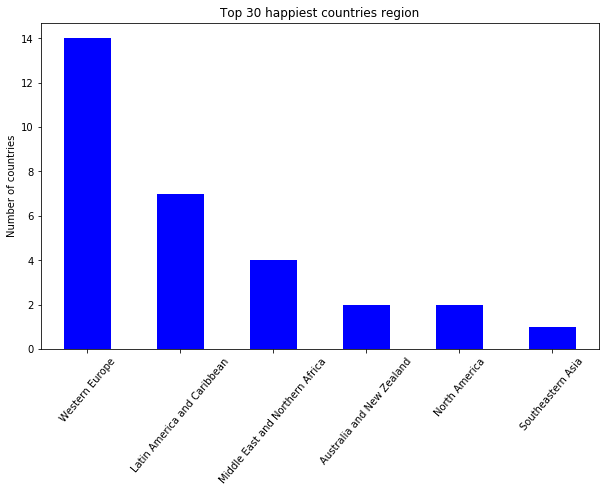

In [91]:
plt.figure(figsize=(10,6))
regions_list = df_2015.sort_values(by=['Happiness Rank'],ascending=True)['Region'].head(30).value_counts()
regions_list.plot(kind = 'bar', color = 'blue', title = 'Top 30 happiest countries region')
plt.ylabel('Number of countries')
plt.xticks(rotation=50)

##### 2016

In [92]:
set(df_2016.Region) 

{'Australia and New Zealand',
 'Central and Eastern Europe',
 'Eastern Asia',
 'Latin America and Caribbean',
 'Middle East and Northern Africa',
 'North America',
 'Southeastern Asia',
 'Southern Asia',
 'Sub-Saharan Africa',
 'Western Europe'}

Regions are the same compared to 2015

In [51]:
table_regions_2016 = df_2016.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)
table_regions_2016

Region
Australia and New Zealand          7.323500
North America                      7.254000
Western Europe                     6.685667
Latin America and Caribbean        6.101750
Eastern Asia                       5.624167
Middle East and Northern Africa    5.386053
Central and Eastern Europe         5.370690
Southeastern Asia                  5.338889
Southern Asia                      4.563286
Sub-Saharan Africa                 4.136421
Name: Happiness Score, dtype: float64

Australia and New Zealand, North America and Western Europe are in average the regions with a highest score in happiness, as seen previously in the map.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

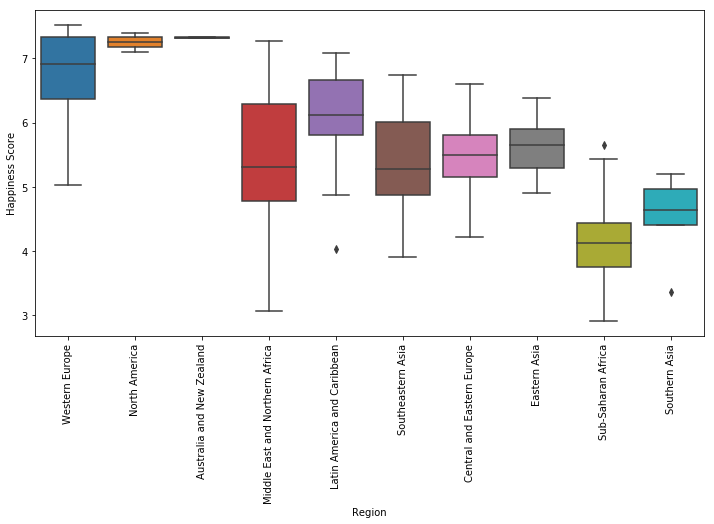

In [68]:
fig, axes = plt.subplots(figsize=(12, 6))
sns.boxplot(x='Region', y='Happiness Score', data = df_2016)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

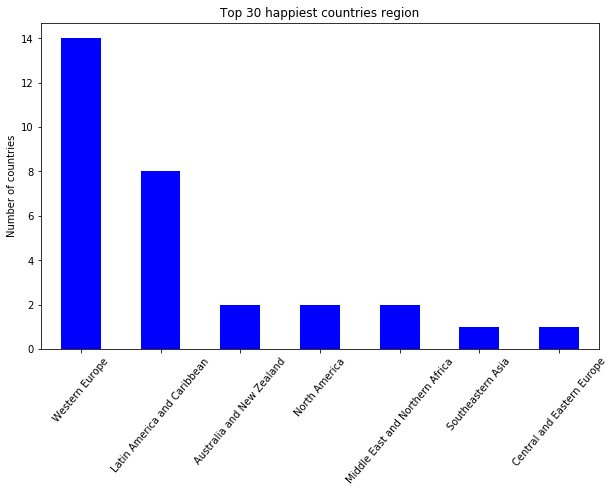

In [94]:
plt.figure(figsize=(10,6))
regions_list = df_2016.sort_values(by=['Happiness Rank'],ascending=True)['Region'].head(30).value_counts()
regions_list.plot(kind = 'bar', color = 'blue', title = 'Top 30 happiest countries region')
plt.ylabel('Number of countries')
plt.xticks(rotation=50)

###### Comparison of Happiness Score between 2015 and 2016

,2015,2016
Western Europe,6.689619,6.685667
North America,7.273000,7.254000
Australia and New Zealand,7.285000,7.323500
Middle East and Northern Africa,5.406900,5.386053
Latin America and Caribbean,6.144682,6.101750
Southeastern Asia,5.317444,5.338889
Central and Eastern Europe,5.332931,5.370690
Eastern Asia,5.626167,5.624167
Sub-Saharan Africa,4.202800,4.136421
Southern Asia,4.580857,4.563286


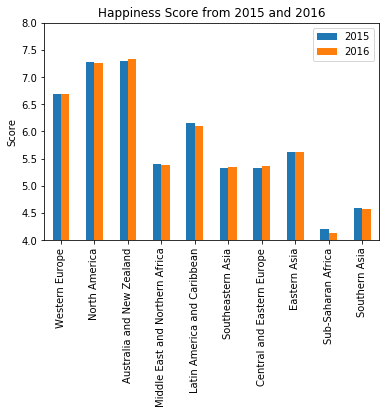

In [53]:
regions = df.Region.unique()
df_plot_regions = pd.DataFrame({'2015': table_regions_2015 , '2016': table_regions_2016} , index=regions)
ax1 = df_plot_regions.plot.bar(rot=90, title = 'Happiness Score from 2015 and 2016')
ax1.set_ybound(4,8)
ax1.set_ylabel("Score")
df_plot_regions

#### Features related to happiness score

In [96]:
#Remove variables not necessary to correlation
df_2015 = df_2015.drop('Standard Error', 1)
df_2016 = df_2016.drop('Lower Confidence Interval', 1)
df_2016 = df_2016.drop('Upper Confidence Interval', 1)

##### 2015

In [ ]:
sns.pairplot(df_2015)

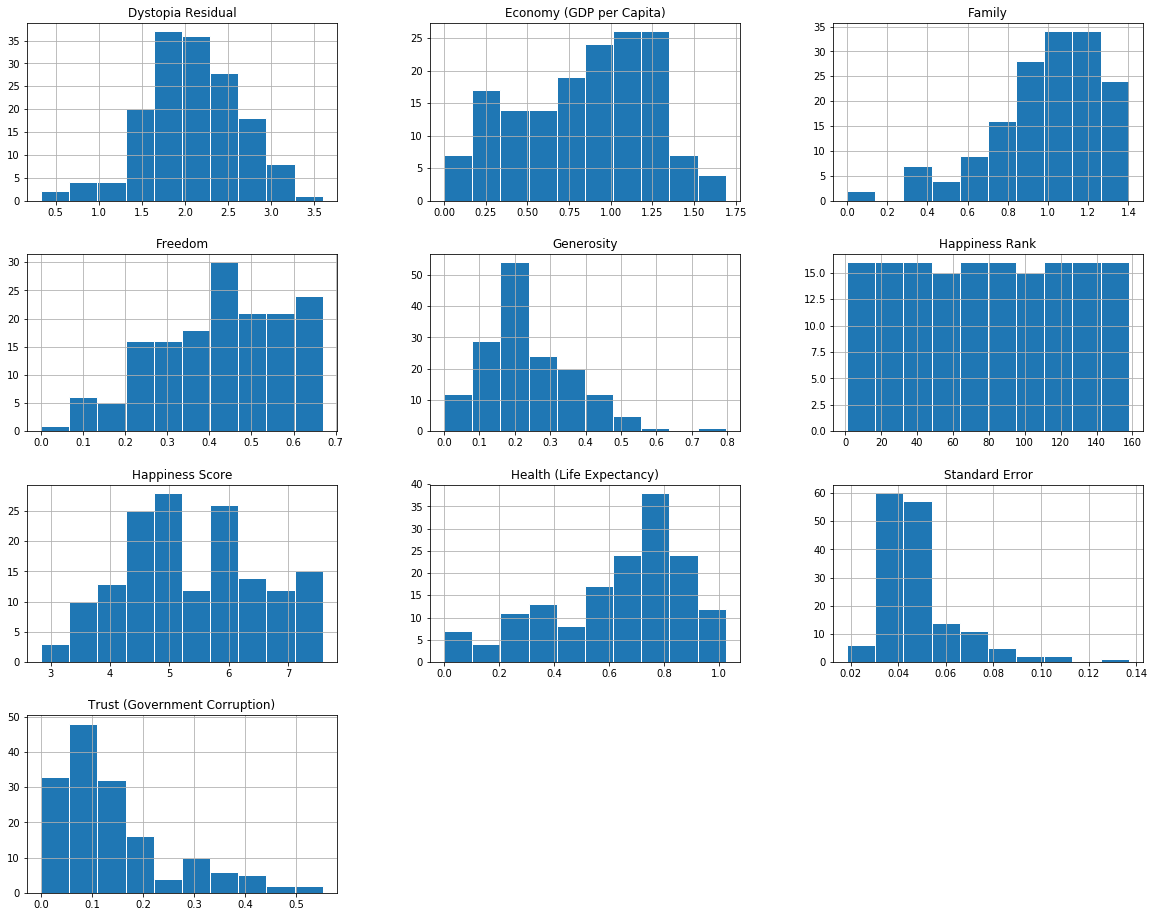

In [46]:
df_2015.hist(edgecolor = 'white', linewidth = 1, figsize = (20,16))
plt.show()

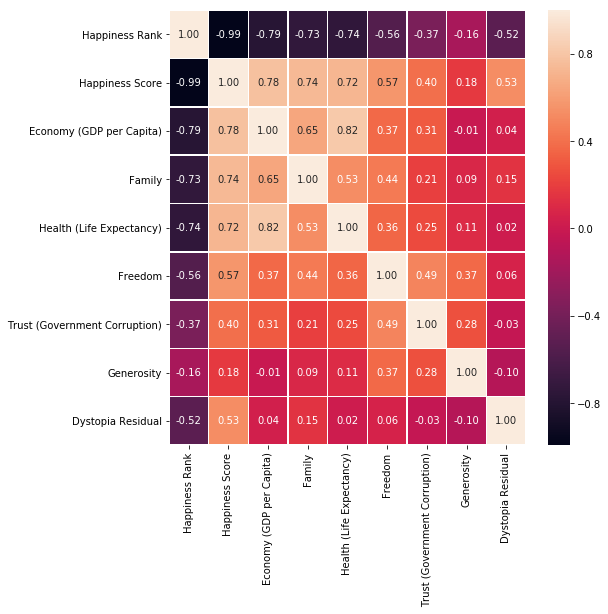

In [97]:
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_2015.corr(),annot=True,linewidths=.5,fmt=".2f",ax=ax)
plt.show()

The heatmap shows that: <br>
The closer the value is to 1.0, the positive correlation is higher, whereas the closer the value is to -1.0, the negative correlation is higher <br>
The factors that most contributed to the happines score are economy, family and health.

 


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



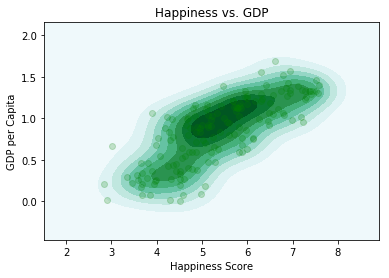

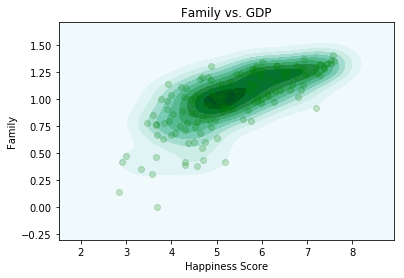

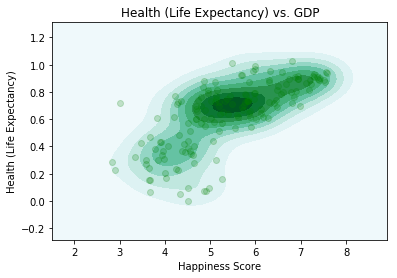

In [38]:
sns.kdeplot(df_2015['Happiness Score'], df_2015['Economy (GDP per Capita)'], shade=True)
plt.scatter(df_2015['Happiness Score'], df_2015['Economy (GDP per Capita)'], alpha=0.2, color='green')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per Capita')
plt.title('Happiness vs. GDP')
plt.show()


sns.kdeplot(df_2015['Happiness Score'], df_2015['Family'], shade=True)
plt.scatter(df_2015['Happiness Score'], df_2015['Family'], alpha=0.2, color='green')
plt.xlabel('Happiness Score')
plt.ylabel('Family')
plt.title('Family vs. GDP')
plt.show()


sns.kdeplot(df_2015['Happiness Score'], df_2015['Health (Life Expectancy)'], shade=True)
plt.scatter(df_2015['Happiness Score'], df_2015['Health (Life Expectancy)'], alpha=0.2, color='green')
plt.xlabel('Happiness Score')
plt.ylabel('Health (Life Expectancy)')
plt.title('Health (Life Expectancy) vs. GDP')
plt.show()

##### 2016

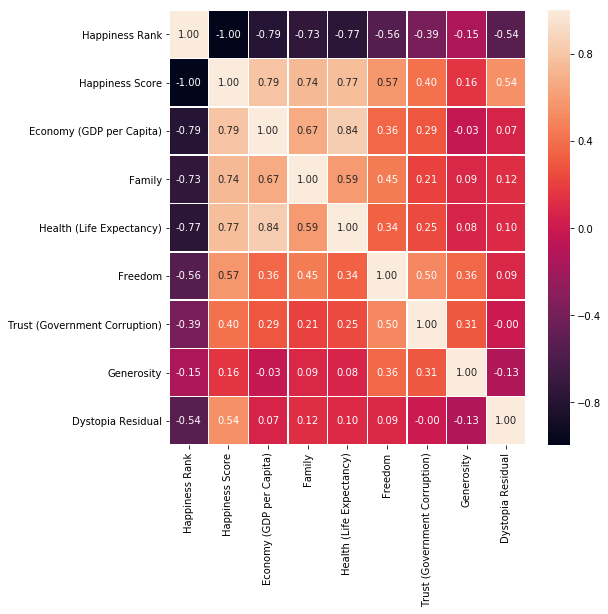

In [98]:
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_2016.corr(),annot=True,linewidths=.5,fmt=".2f",ax=ax)
plt.show()

The factors that most contributed to the happines score are economy, family and health.

##### KS TEST - Comparing  Economy (GDP per Capita) with Happiness Score 2015

In [23]:
score = df_2015['Happiness Score'] 
gdp = df_2015['Economy (GDP per Capita)'] 
print ('Spearman: ',stats.spearmanr(score, gdp))
print ('Pearson: ',stats.pearsonr(score, gdp))

Spearman:  SpearmanrResult(correlation=0.7957028014396273, pvalue=8.572517012563218e-36)
Pearson:  (0.7809655268660215, 1.0505384131958713e-33)


pvalue close to zero -> good

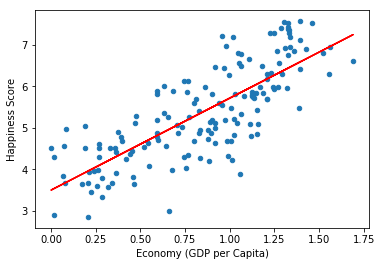

In [37]:
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(gdp, score)
df_2015.plot(x='Economy (GDP per Capita)',y='Happiness Score',kind='scatter')
plt.plot(gdp,gdp*slope+intercept,'r')

plt.show()

In [24]:
NA = len(score)
X1 = np.sort(score)
F1 = np.array(range(NA+1))/float(NA) 
X1, F1

(array([2.839, 2.905, 3.006, 3.34 , 3.465, 3.575, 3.587, 3.655, 3.656,
        3.667, 3.678, 3.681, 3.781, 3.819, 3.845, 3.896, 3.904, 3.931,
        3.956, 3.989, 3.995, 4.033, 4.077, 4.194, 4.218, 4.252, 4.271,
        4.292, 4.297, 4.307, 4.332, 4.35 , 4.369, 4.419, 4.436, 4.507,
        4.512, 4.514, 4.517, 4.518, 4.55 , 4.565, 4.571, 4.61 , 4.633,
        4.642, 4.677, 4.681, 4.686, 4.694, 4.715, 4.739, 4.786, 4.788,
        4.8  , 4.839, 4.857, 4.867, 4.874, 4.876, 4.885, 4.898, 4.949,
        4.959, 4.971, 5.007, 5.013, 5.057, 5.073, 5.098, 5.102, 5.123,
        5.124, 5.129, 5.14 , 5.192, 5.192, 5.194, 5.212, 5.253, 5.268,
        5.286, 5.332, 5.36 , 5.399, 5.429, 5.474, 5.477, 5.548, 5.589,
        5.605, 5.689, 5.695, 5.709, 5.716, 5.754, 5.759, 5.77 , 5.791,
        5.813, 5.824, 5.828, 5.833, 5.848, 5.855, 5.878, 5.889, 5.89 ,
        5.948, 5.96 , 5.975, 5.984, 5.987, 5.995, 6.003, 6.123, 6.13 ,
        6.168, 6.269, 6.295, 6.298, 6.302, 6.329, 6.411, 6.455, 6.477,
      

In [25]:
X2 = np.sort(gdp)
F2 = np.array(range(NA+1))/float(NA) 
X2, F2

(array([0.     , 0.0153 , 0.01604, 0.0694 , 0.0712 , 0.0785 , 0.08308,
        0.17417, 0.18847, 0.19073, 0.20824, 0.20868, 0.21102, 0.22208,
        0.23906, 0.25812, 0.26074, 0.26673, 0.271  , 0.27108, 0.2852 ,
        0.28665, 0.31982, 0.33024, 0.34193, 0.35997, 0.36471, 0.36498,
        0.37545, 0.39047, 0.39753, 0.4225 , 0.44025, 0.45407, 0.46038,
        0.46534, 0.47038, 0.47428, 0.52107, 0.54558, 0.54649, 0.59066,
        0.59325, 0.59448, 0.59532, 0.59543, 0.59867, 0.63216, 0.63244,
        0.64499, 0.65435, 0.6632 , 0.67866, 0.68133, 0.70532, 0.71206,
        0.73479, 0.7419 , 0.74553, 0.75778, 0.75985, 0.76454, 0.76821,
        0.77042, 0.79907, 0.80148, 0.81038, 0.82819, 0.82827, 0.83223,
        0.83524, 0.86402, 0.87867, 0.88113, 0.8818 , 0.89012, 0.89537,
        0.90019, 0.90198, 0.91851, 0.91861, 0.92049, 0.92053, 0.93929,
        0.95578, 0.95847, 0.9669 , 0.97438, 0.98124, 0.98549, 0.99355,
        0.99534, 1.00761, 1.0088 , 1.01216, 1.02054, 1.02389, 1.02564,
      

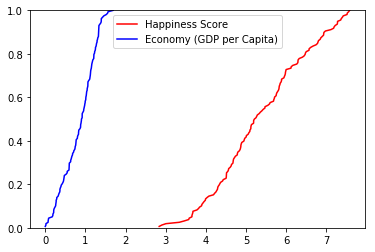

In [26]:
plt.plot(X1, F1[1:],'r')
plt.plot(X2, F2[1:],'b')
plt.ylim(0,1)
plt.legend(["Happiness Score", "Economy (GDP per Capita)"])
plt.show()

In [28]:
stats.ks_2samp(X1, X2)

Ks_2sampResult(statistic=1.0, pvalue=4.2009415115968824e-71)

This is a two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution. <br>
pvalue ~ 0 - reject null hypothesis that happiness score and GDP distributions are equal

In [13]:
def expcdf(t, beta=1.0):
    return 1.0 - np.exp(-t/beta)
#define cumulative normal
def normal_cdf(x, mu=0,sigma=1):
    return (1 + sp.special.erf((x - mu) / np.sqrt(2) / sigma)) / 2  

In [29]:
mean_hs=df_2015['Happiness Score'].mean()
mean_gdp=df_2015['Economy (GDP per Capita)'].mean()
st_hs = df_2015['Happiness Score'].std()
st_gdp = df_2015['Economy (GDP per Capita)'].std()
mean_hs, mean_gdp, st_hs, st_gdp

(5.3757341772151905,
 0.8461372151898726,
 1.1450101349520667,
 0.4031207785379101)

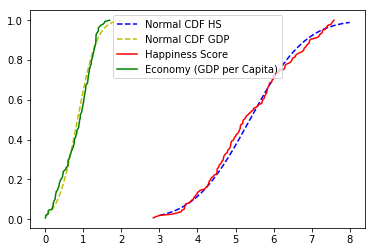

In [31]:
x1 = np.linspace(3, 8, 1000)
x2 = np.linspace(0, 2, 1000)
plt.plot(x1, normal_cdf(x1, mu=mean_hs,sigma=st_hs), 'b--')
plt.plot(x2, normal_cdf(x2, mu=mean_gdp,sigma=st_gdp), 'y--')
plt.plot(X1, F1[1:],'r')
plt.plot(X2, F2[1:],'g')
plt.legend(["Normal CDF HS","Normal CDF GDP", "Happiness Score", "Economy (GDP per Capita)"])
plt.show()

In [32]:
stats.kstest(X1, normal_cdf, args=(mean_hs,st_hs))

KstestResult(statistic=0.056854125821328816, pvalue=0.6938523390178299)

When testing against the normal data we got D = 0.06 and a p-value of 0.69, meaning that 69% of the time we would expect a value of D as large as the one actually got even if the data had been drawn from the proposed distribution. We therefore cannot reject the hypothesis that the data were drawn from the proposed distribution.


In [33]:
stats.kstest(X2, normal_cdf, args=(mean_gdp,st_gdp))

KstestResult(statistic=0.07646445430109594, pvalue=0.29960865413502535)

When testing against the normal data we got D = 0.08 and a p-value of 0.30, meaning that 30% of the time we would expect a value of D as large as the one actually got even if the data had been drawn from the proposed distribution. We therefore cannot reject the hypothesis that the data were drawn from the proposed distribution.

In [84]:
#TODO
#fazer melhores análise e definir objectivos
#fazer gráfico de regressão - ver rabiulcste
#testar com várias distribuições
#perceber se deve-se por outra variavel independente
#por estrutura -> load de dados, ver variaveis e nulos, mean and std, correlação, ver maiores correlações, gráfico de regressão linear, ks_test(?), gráficos pandas
#fazer aqueles graficos enormes
#fazer variação de rank